<a href="https://colab.research.google.com/github/erosthales/Analise_Python/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [58]:
Loja1_Faturamente = loja1["Preço"].sum().item()
Loja2_Faturamente = loja2["Preço"].sum().item()
Loja3_Faturamente = loja3["Preço"].sum().item()
Loja4_Faturamente = loja4["Preço"].sum().item()

print(f"Faturamente: Loja 1 - R${Loja1_Faturamente:,.2f} Loja 2 - R${Loja2_Faturamente:,.2f} Loja 3 - R${Loja3_Faturamente:,.2f} Loja 4 - R${Loja4_Faturamente:,.2f}")

Todos_Faturamento = [Loja1_Faturamente, Loja2_Faturamente, Loja3_Faturamente, Loja4_Faturamente]
Lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]

soma_faturamento = [Loja1_Faturamente + Loja3_Faturamente + Loja3_Faturamente + Loja4_Faturamente ]
soma_faturamento = sum(Todos_Faturamento)  # Supondo que seja uma lista de números
print(f"Faturamento total: R$ {soma_faturamento:,.2f}")




Faturamente: Loja 1 - R$1,534,509.12 Loja 2 - R$1,488,459.06 Loja 3 - R$1,464,025.03 Loja 4 - R$1,384,497.58
Faturamento total: R$ 5,871,490.79


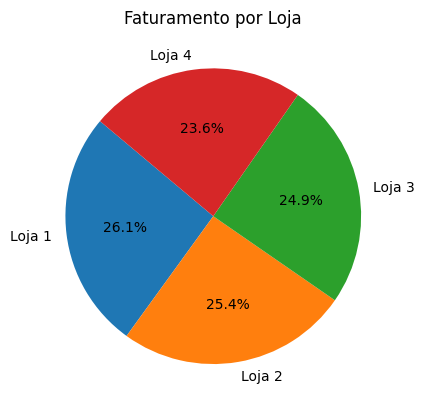

In [41]:
plt.pie(Todos_Faturamento, labels=Lojas, autopct="%1.1f%%", startangle=140)
plt.title("Faturamento por Loja")
plt.show()

# 2. Vendas por Categoria


In [61]:
Categoria1 = loja1.groupby("Categoria do Produto")["Produto"].count().reset_index(name="Quantidade")
Categoria2 = loja2.groupby("Categoria do Produto")["Produto"].count().reset_index(name="Quantidade")
Categoria3 = loja3.groupby("Categoria do Produto")["Produto"].count().reset_index(name="Quantidade")
Categoria4 = loja4.groupby("Categoria do Produto")["Produto"].count().reset_index(name="Quantidade")

todas_categorias = pd.concat([Categoria1, Categoria2, Categoria3, Categoria4], axis=0)
soma_categorias = todas_categorias.groupby("Categoria do Produto")["Quantidade"].sum().reset_index()

print(Categoria4)

print(Categoria1)

    Categoria do Produto  Quantidade
0             brinquedos         338
1       eletrodomesticos         254
2            eletronicos         451
3        esporte e lazer         277
4  instrumentos musicais         170
5                 livros         187
6                 moveis         480
7  utilidades domesticas         201
    Categoria do Produto  Quantidade
0             brinquedos         324
1       eletrodomesticos         312
2            eletronicos         448
3        esporte e lazer         284
4  instrumentos musicais         182
5                 livros         173
6                 moveis         465
7  utilidades domesticas         171


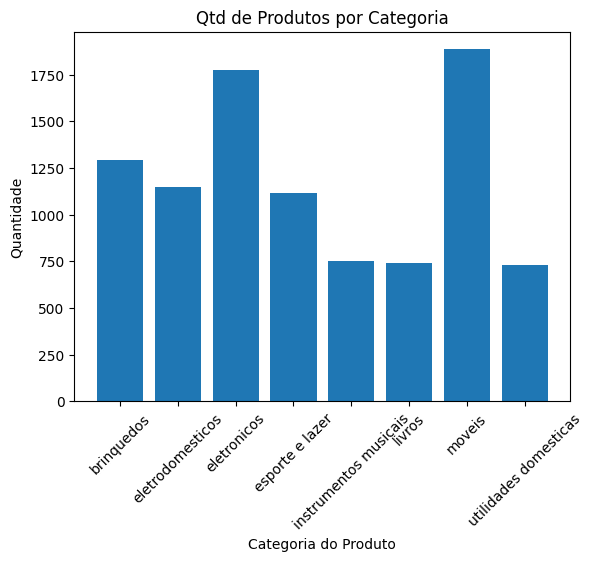

In [54]:

plt.bar(soma_categorias["Categoria do Produto"], soma_categorias['Quantidade'])
plt.title("Qtd de Produtos por Categoria")
plt.xlabel("Categoria do Produto")
plt.ylabel("Quantidade")
plt.xticks(rotation=45)  # Inclina os rótulos se forem longos
plt.show()


# 3. Média de Avaliação das Lojas

In [21]:
Loja1_Media = loja1["Avaliação da compra"].mean()
Loja2_Media = loja2["Avaliação da compra"].mean()
Loja3_Media = loja3["Avaliação da compra"].mean()
Loja4_Media = loja4["Avaliação da compra"].mean()

print(f"Média de Avaliação: Loja 1 - {Loja1_Media:.2f} Loja 2 - {Loja2_Media:.2f} Loja 3 - {Loja3_Media:.2f} Loja 4 - {Loja4_Media:.2f}")
lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
medias = [Loja1_Media, Loja2_Media, Loja3_Media, Loja4_Media]

Média de Avaliação: Loja 1 - 3.98 Loja 2 - 4.04 Loja 3 - 4.05 Loja 4 - 4.00


# 4. Produtos Mais e Menos Vendidos

In [29]:
Loja1_MaisMenos = loja1["Produto"].value_counts()
Loja2_MaisMenos = loja2["Produto"].value_counts()
Loja3_MaisMenos = loja3["Produto"].value_counts()
Loja4_MaisMenos = loja4["Produto"].value_counts()

resultado = (
    f"- Loja 1 - Produto mais vendido: {Loja1_MaisMenos.iloc[0]} e o Produto menos vendido: {Loja1_MaisMenos.iloc[-1]}\n"
    f"- Loja 2 - Produto mais vendido: {Loja2_MaisMenos.iloc[0]} e o Produto menos vendido: {Loja2_MaisMenos.iloc[-1]}\n"
    f"- Loja 3 - Produto mais vendido: {Loja3_MaisMenos.iloc[0]} e o Produto menos vendido: {Loja3_MaisMenos.iloc[-1]}\n"
    f"- Loja 4 - Produto mais vendido: {Loja4_MaisMenos.iloc[0]} e o Produto menos vendido: {Loja4_MaisMenos.iloc[-1]}"
)

print(resultado)

- Loja 1 - Produto mais vendido: 60 e o Produto menos vendido: 33
- Loja 2 - Produto mais vendido: 65 e o Produto menos vendido: 32
- Loja 3 - Produto mais vendido: 57 e o Produto menos vendido: 35
- Loja 4 - Produto mais vendido: 62 e o Produto menos vendido: 33


# 5. Frete Médio por Loja


In [38]:
Frete1 = loja1["Frete"].median()
Frete2 = loja2["Frete"].median()
Frete3 = loja3["Frete"].median()
Frete4 = loja4["Frete"].median()

resultado = (
    f"- Loja 1 - {round(Frete1, 2)} \n"
    f"- Loja 2 - {round(Frete2, 2)} \n"
    f"- Loja 3 - {round(Frete3, 2)} \n"
    f"- Loja 4 - {round(Frete4, 2)} \n"
)
print(resultado)
valores = [round(Frete1, 2), round(Frete2, 2), round(Frete3, 2), round(Frete4, 2)]



- Loja 1 - 16.5 
- Loja 2 - 15.41 
- Loja 3 - 15.88 
- Loja 4 - 14.61 



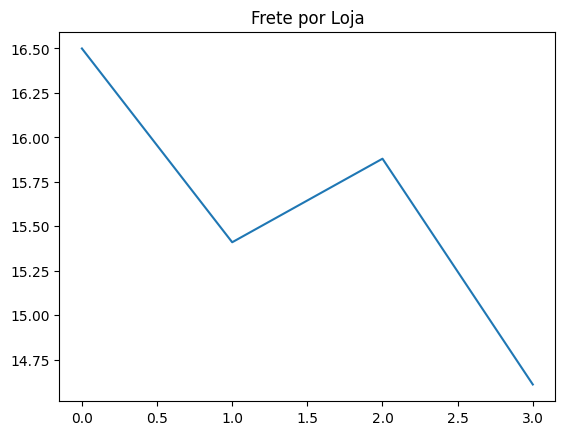

In [39]:
plt.plot(valores)
plt.title("Frete por Loja")
plt.show()

# Recomendação sobre a venda de lojas

Após um analise de dados, a decisão mais correta com base nas analise seria, manter a loja 1 e **vender a loja 4**.

De acordo com a analise apresentada, a Loja 4 é a unica no ramo que apresentação um faturamente a baixo do experando, mesmo que uma analise de "Avalição de Loja" ela fica com uma media de: 4.00, em contra partida seu faturamente e muito inferior a loja 1.


**As Lojas 1 e 2, tem um percentual de faturamente equilibrado**, e media de avaliação parecida, sendo uma decisão mais segura mandanter essas Lojas. Em contraste, a **Loja 1 demonstrou excelente desempenho, com um faturamento muito superior ao da Loja 4**. Isso pode indicar uma base sólida de clientes e uma localização estratégica, contribuindo diretamente para seus bons resultados.

As Lojas 2 e 3 apresentaram faturamento estável é a recomendação é a manutenção dessas unidades, considerando que oferecem menor risco operacional no cenário atual.